### 예제
1. csv폴더안에 있는 drinks.csv 파일 로드
2. 해당하는 데이터 프레임에서 결측치가 존재하는가?
3. continent컬럼에서 결측치가 존재하는데 결측치들을 'OT' 값으로 대체
4. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '양주소비량', '와인소비량', '알콜농도', '대륙']
5. 알콜농도 컬럼 데이터의 총 평균보다 높은 대륙은 어디인가
    - 대륙별 그룹화/ 알콜농도의 평균
    - 전체 알콜농도의 평균값보다 큰 데이터를 출력
6. 국가별 술 소비량 대비 알콜의 비율 이라는 컬럼생성


In [54]:
# pandas 라이브러리 로드
import pandas as pd

In [55]:
# read_csv() 를 이용하여 csv 파일 로드
drink = pd.read_csv("./csv/drinks.csv")

In [56]:
# 백업파일 생성
df = drink.copy()

In [57]:
# 결측치 확인 후 'continent' 컬럼의 결측치는 'OT'로 치환
df.isna().sum()
df['continent'] = df['continent'].fillna('OT')

In [58]:
# 컬럼명 변경
# df라는 Class 안에 있는 독립적인 변수값인 columns의 데이터 변경
df.columns = ['국가','맥주소비량','양주소비량','와인소비량','알콜농도','대륙']
df.columns

Index(['국가', '맥주소비량', '양주소비량', '와인소비량', '알콜농도', '대륙'], dtype='object')

In [59]:
# 전체 데이터의 알콜농도 평균값
average = df['알콜농도'].mean()

# 대륙별(대륙 컬럼의 데이터를 기준으로 그룹화) 알콜농도의 평균(그룹화 연산)
group_data = df[['알콜농도','대륙']].groupby(['대륙']).mean()
(average < group_data)['알콜농도']

flag = average < group_data['알콜농도']
group_data.loc[flag]

,알콜농도
대륙,
EU,8.617778
OT,5.995652
SA,6.308333


In [65]:
# 술 소비량 대비 알콜농도 새로운 컬럼 생성

# 전체 술 소비량 컬럼 생성 [ 맥주+양주+와인 ]
df['전체술소비량'] = df['맥주소비량'] + df['양주소비량']+ df['와인소비량']
df['비율'] = ((df['알콜농도'] / df['전체술소비량']) * 100).fillna(0)

국가         Zimbabwe
맥주소비량           376
양주소비량           438
와인소비량           370
알콜농도           14.4
대륙               SA
전체술소비량          695
비율        26.666667
dtype: object

In [69]:
# 비율 컬럼의 데이터를 기준으로 내림차순 정렬
df2 =df.sort_values(['전체술소비량'], ascending=False)

In [76]:
# 'South Korea' 의 랭킹
# 인덱스를 초기화, 기존인덱스 삭제
df2.reset_index(drop=True, inplace=True)

# 국가 데이터에서 South Korea 검색
# 데이터프레임에서 국가 컬럼의 데이터들 중 'South Korea' 와 같은 데이터가 존재하는가? -> 조건식
# 해당하는 조건식을 loc[조건식] 데이터를 출력

# 조건식 생성
flag = df2['국가'] =='South Korea'
# loc[]를 이용하여 필터
df2.loc[flag]

,국가,맥주소비량,양주소비량,와인소비량,알콜농도,대륙,전체술소비량,비율
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [78]:
# 해당하는 데이터를 그래프로 시각화
import matplotlib.pyplot as plt

c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


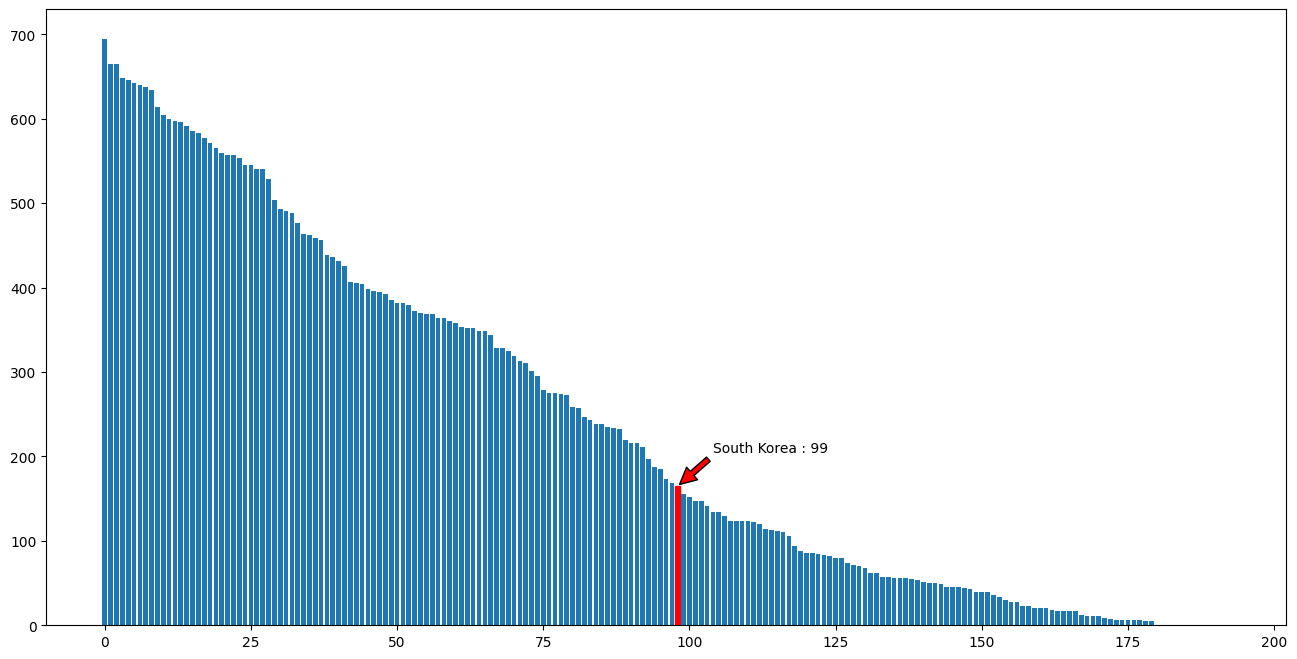

In [92]:
# 술 소비량이 높은 순서대로 바형 그래프 표시
x = df2.index
y = df2['전체술소비량']

# 한국의 인덱스는 몇 인가?
korea_index = df2.loc[df2['국가'] == 'South Korea'].index[0]
# 한국의 전체술소비량은 몇인가?
korea_total = df2.loc[df2['국가'] == 'South Korea','전체술소비량']

# 그래프 사이즈 변경
plt.figure(figsize=(16,8))

drink_graph = plt.bar(x,y)

# 한국 데이터의 막대의 색을 변경
# 그래프에서 99번째 막대를 선택하여 색을 빨간색으로 변경
drink_graph[korea_index].set_color('r')

# 그래프에 주석을 추가
plt.annotate(
    'South Korea : ' + str(korea_index+1),              # 주석의 텍스트
    xytext = (korea_index + 6, korea_total + 40),       # 텍스트의 위치
    xy = (korea_index,korea_total),                     # 텍스트가 가르키는 막대의 좌표
    arrowprops =dict(                                   # 화살표의 모양
        facecolor = 'r',
        shrink = 0.05
    )
)

plt.show()